In [ ]:
!pip install torch transformers sklearn scipy matplotlib wandb

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from torch.optim import Adam
from torch.optim.lr_scheduler import ReduceLROnPlateau
from transformers import AutoTokenizer, AutoModel
import json
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import wandb
from torch.cuda.amp import autocast, GradScaler
from torch.utils.checkpoint import checkpoint
from torch.cuda import empty_cache
from tqdm.auto import tqdm

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/241k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/492k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/169 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/870 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/458M [00:00<?, ?B/s]

<ipython-input-3-fd537719c181>:346: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler       = GradScaler()
<ipython-input-3-fd537719c181>:348: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


[Epoch 1/10] Train:   0%|          | 0/110 [00:00<?, ?it/s]

<ipython-input-3-fd537719c181>:362: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Attention type 'block_sparse' is not possible if sequence_length: 128 <= num global tokens: 2 * config.block_size + min. num sliding tokens: 3 * config.block_size + config.num_random_blocks * config.block_size + additional buffer: config.num_random_blocks * config.block_size = 704 with config.block_size = 64, config.num_random_blocks = 3. Changing attention type to 'original_full'...


[Epoch 1/10] Val  :   0%|          | 0/28 [00:00<?, ?it/s]

<ipython-input-3-fd537719c181>:402: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 1/10  Train Loss: 0.1233  Val Loss: 0.0556
Epoch 1/10  Train Loss: 0.1233  Val Loss:   0.0556


[Epoch 2/10] Train:   0%|          | 0/110 [00:00<?, ?it/s]

[Epoch 2/10] Val  :   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 2/10  Train Loss: 0.0675  Val Loss: 0.0343
Epoch 2/10  Train Loss: 0.0675  Val Loss:   0.0343


[Epoch 3/10] Train:   0%|          | 0/110 [00:00<?, ?it/s]

[Epoch 3/10] Val  :   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 3/10  Train Loss: 0.0584  Val Loss: 0.0359
Epoch 3/10  Train Loss: 0.0584  Val Loss:   0.0359


[Epoch 4/10] Train:   0%|          | 0/110 [00:00<?, ?it/s]

[Epoch 4/10] Val  :   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 4/10  Train Loss: 0.0508  Val Loss: 0.0342
Epoch 4/10  Train Loss: 0.0508  Val Loss:   0.0342


[Epoch 5/10] Train:   0%|          | 0/110 [00:00<?, ?it/s]

[Epoch 5/10] Val  :   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 5/10  Train Loss: 0.0516  Val Loss: 0.0360
Epoch 5/10  Train Loss: 0.0516  Val Loss:   0.0360


[Epoch 6/10] Train:   0%|          | 0/110 [00:00<?, ?it/s]

[Epoch 6/10] Val  :   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 6/10  Train Loss: 0.0492  Val Loss: 0.0482
Epoch 6/10  Train Loss: 0.0492  Val Loss:   0.0482


[Epoch 7/10] Train:   0%|          | 0/110 [00:00<?, ?it/s]

[Epoch 7/10] Val  :   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 7/10  Train Loss: 0.0472  Val Loss: 0.0465
Epoch 7/10  Train Loss: 0.0472  Val Loss:   0.0465


[Epoch 8/10] Train:   0%|          | 0/110 [00:00<?, ?it/s]

[Epoch 8/10] Val  :   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 8/10  Train Loss: 0.0446  Val Loss: 0.0383
Epoch 8/10  Train Loss: 0.0446  Val Loss:   0.0383


[Epoch 9/10] Train:   0%|          | 0/110 [00:00<?, ?it/s]

[Epoch 9/10] Val  :   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 9/10  Train Loss: 0.0467  Val Loss: 0.0394
Epoch 9/10  Train Loss: 0.0467  Val Loss:   0.0394


[Epoch 10/10] Train:   0%|          | 0/110 [00:00<?, ?it/s]

[Epoch 10/10] Val  :   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 10/10  Train Loss: 0.0428  Val Loss: 0.0438
Epoch 10/10  Train Loss: 0.0428  Val Loss:   0.0438
Final Evaluation → RMSE: 0.2240, MAE: 0.1851, Pearson: 0.8317, CRPS: 0.0502, ECE: 0.1299


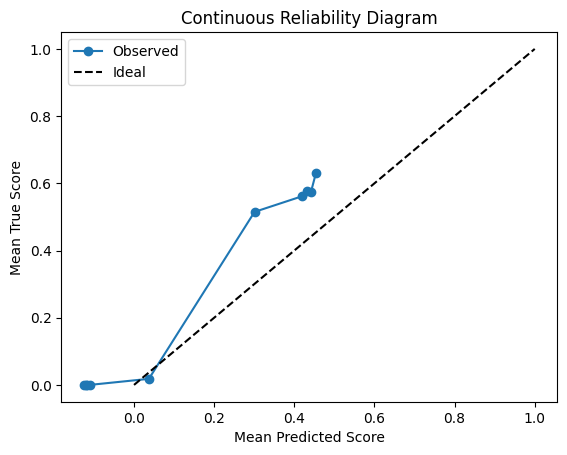

In [ ]:
# ── 1) Configuration ─────────────────────────────────────────────────────
MODEL_NAME    = "monologg/kobigbird-bert-base"
DROPOUT_RATE  = 0.5
LEARNING_RATE = 1e-5
L2_LAMBDA     = 1e-3
BATCH_SIZE    = 1
EPOCHS        = 10
MAX_LEN       = 128

# Utterance representation dims
ENC_HIDDEN    = 768
UT_DIM        = 100
PROJ_DIM      = UT_DIM
RANK          = 10
SLICES        = UT_DIM
CNN_CHANNELS  = 200

# ── 2) Dataset: 대화 단위 그룹화 (left/right 추가) ──────────────────────────
class DialogueDataset(Dataset):
    def __init__(self, path, tokenizer, perspective):
        """
        perspective: 'male' or 'female'
        """
        self.tokenizer  = tokenizer
        self.persp      = perspective
        self.label_key  = f"soft_label_{perspective}"
        dialogues = {}
        with open(path, encoding='utf-8') as f:
            for line in f:
                it = json.loads(line)
                dialogues.setdefault(it['dialogue_id'], []).append(it)
        self.dialogues = list(dialogues.values())

    def __len__(self):
        return len(self.dialogues)

    def __getitem__(self, idx):
        items = self.dialogues[idx]
        batch = {
            'left_ids':[], 'left_mask':[],
            'cur_ids':[],  'cur_mask':[],
            'right_ids':[],'right_mask':[],
            'label':[],    # float tensor
            'loss_mask':[] # 1 if this utterance is in-perspective else 0
        }
        for it in items:
            # --- 토크나이즈 ---
            for side in ('left','cur','right'):
                text = it.get(f'context_{side}') if side!='cur' else it['text']
                text = text or ""
                enc  = self.tokenizer(text,
                                      truncation=True,
                                      padding='max_length',
                                      max_length=MAX_LEN,
                                      return_tensors='pt')
                batch[f'{side}_ids'].append( enc.input_ids .squeeze(0) )
                batch[f'{side}_mask'].append(enc.attention_mask.squeeze(0).bool())

            # --- 레이블 & 마스크 ---
            if it['speaker']==self.persp:
                # 내 관점 발화일 때만 진짜 레이블
                batch['label'].append(torch.tensor(
                    float(it[self.label_key]), dtype=torch.float))
                batch['loss_mask'].append(1)
            else:
                # 그 외 발화는 0으로 채우고, 손실에선 무시
                batch['label'].append(torch.tensor(0., dtype=torch.float))
                batch['loss_mask'].append(0)

        # stack → (T, …)
        for k in ('left_ids','left_mask','cur_ids','cur_mask','right_ids','right_mask'):
            batch[k] = torch.stack(batch[k])
        batch['label']     = torch.stack(batch['label'])
        batch['loss_mask'] = torch.tensor(batch['loss_mask'], dtype=torch.bool)
        return batch



# ── 3) TransformerEmbed + n-gram CNN + CLS Adapter ─────────────────────────
class TransformerEmbed(nn.Module):
    def __init__(self, model_name=MODEL_NAME, fine_tune=True):
        super().__init__()
        # 1) 사전학습 모델 로드
        self.encoder      = AutoModel.from_pretrained(model_name)
        self.encoder.gradient_checkpointing_enable()
        self.encoder.config.use_cache = False
        self.pad_token_id = self.encoder.config.pad_token_id

        # 2) n-gram CNN 브랜치 (3,4,5-gram × 50채널)
        self.convs        = nn.ModuleList([
            nn.Conv1d(ENC_HIDDEN, 50, k, padding=k//2)
            for k in (3, 4, 5)
        ])
        self.fc_ngram     = nn.Linear(50 * 3, PROJ_DIM)

        # 3) CLS 어댑터 브랜치
        self.proj_cls     = nn.Linear(ENC_HIDDEN, PROJ_DIM)
        self.cnn_adapter  = nn.Conv1d(1, PROJ_DIM, kernel_size=3, padding=1)
        self.pool_adapter = nn.AdaptiveMaxPool1d(1)

        # 4) 드롭아웃
        self.dropout      = nn.Dropout(DROPOUT_RATE)

    def forward(self, ids, _mask_unused=None):
        # 1) 원본 토큰 마스크 (pad_token_id 기준)
        mask_tok = ids.ne(self.pad_token_id)      # (B, T_tok)

        # 2) Transformer 인코딩
        out  = self.encoder(input_ids=ids, attention_mask=mask_tok.float())
        seq  = out.last_hidden_state              # (B, T_enc, H)
        x    = seq.permute(0,2,1)                # (B, H, T_enc)

        # 3) n-gram CNN 브랜치
        feats = []
        for conv in self.convs:
            c = conv(x)                          # (B, C, Tc)
            Tc = c.size(2)

            # --- 여기서 mask_tok → mask_conv로 재생성 ---
            if mask_tok.size(1) < Tc:
                # 부족분은 False(padding)로 채움
                pad = torch.zeros(
                    mask_tok.size(0), Tc - mask_tok.size(1),
                    dtype=torch.bool, device=mask_tok.device
                )
                mask_conv = torch.cat([mask_tok, pad], dim=1)
            elif mask_tok.size(1) > Tc:
                mask_conv = mask_tok[:, :Tc]
            else:
                mask_conv = mask_tok

            # (B,1,Tc) 로 형태 맞춘 뒤에 fill
            neg_inf = torch.tensor(-float('inf'), dtype=c.dtype, device=c.device)
            c = c.masked_fill(~mask_conv.unsqueeze(1), neg_inf)

            pooled = F.relu(c).max(dim=2)[0]     # (B, C)
            feats.append(pooled)

        ngram = F.relu(self.fc_ngram(torch.cat(feats, dim=1)))  # (B, PROJ_DIM)

        # 5) CLS 토큰 어댑터 브랜치
        cls_token = seq[:, 0]                            # (B, H)
        cls_proj  = F.relu(self.proj_cls(cls_token))     # (B, PROJ_DIM)
        a         = cls_proj.unsqueeze(1)                # (B,1,PROJ_DIM)
        c2        = F.relu(self.cnn_adapter(a))          # (B,PROJ_DIM,PROJ_DIM)
        c2        = self.pool_adapter(c2).squeeze(-1)    # (B, PROJ_DIM)
        cls_feat  = cls_proj + c2                        # (B, PROJ_DIM)

        # 6) 두 브랜치 결합 & 드롭아웃
        feat = (ngram + cls_feat) * 0.5                  # (B, PROJ_DIM)
        return self.dropout(feat)                        # (B, PROJ_DIM)



# ── 4) GNTB w/ randomized init and dropout ─────────────────────────────────
class GNTB(nn.Module):
    def __init__(self, input_dim, r, k, use_context=True):
        """
        input_dim: expected size of concatenated vector
        r: tensor rank for decomposition
        k: number of tensor slices
        use_context: if True, when prev_p is None use zero-context of size k concatenated with utt;
                     if False, use utt directly as m (for second NTN stage)
        """
        super().__init__()
        self.input_dim = input_dim
        self.k = k
        self.r = r
        self.use_context = use_context

        # Parameters for tensor decomposition
        self.U = nn.Parameter(torch.randn(k, input_dim, r) * 0.02)
        self.V = nn.Parameter(torch.randn(k, r, input_dim) * 0.02)
        self.e = nn.Parameter(torch.randn(k, input_dim) * 0.02)
        self.W = nn.Parameter(torch.randn(k, input_dim) * 0.02)
        self.bias = nn.Parameter(torch.randn(k) * 0.02)
        self.dropout = nn.Dropout(DROPOUT_RATE)

    def forward(self, prev_p, utt):
        # If utt is 3D (B,1,D) or similar, flatten to 2D (B,D)
        if utt.dim() > 2:
            utt = utt.view(utt.size(0), -1)  # (B, D)

        # Determine m based on use_context flag
        if self.use_context:
            # Create zero context of shape (B, k)
            if prev_p is None:
                ctx = torch.zeros(utt.size(0), self.k, device=utt.device)
            else:
                # If prev_p is 3D, flatten
                if prev_p.dim() > 2:
                    prev_p = prev_p.view(prev_p.size(0), -1)
                ctx = prev_p
            # Concatenate context and utterance
            m = torch.cat([ctx, utt], dim=1)  # (B, k + utt_dim)
        else:
            # No context: use utt directly
            m = utt  # (B, input_dim)

        # Validate input dimension
        if m.size(1) != self.input_dim:
            raise RuntimeError(f"NTN input dim mismatch: expected {self.input_dim}, got {m.size(1)}")

        B = m.size(0)
        outs = []
        # Iteratively compute each tensor slice
        for i in range(self.k):
            UV = self.U[i] @ self.V[i]  # (input_dim, input_dim)
            # bilinear interaction
            t = torch.bmm(
                m.unsqueeze(1),  # (B,1,input_dim)
                UV.unsqueeze(0).expand(B, -1, -1)  # (B,input_dim,input_dim)
            )  # -> (B,1,input_dim)
            t = torch.bmm(t, m.unsqueeze(2)).squeeze(1)  # -> (B)
            # diagonal term
            de = (m * m * self.e[i]).sum(dim=1)  # (B)
            # linear term
            lin = (m * self.W[i]).sum(dim=1)  # (B)
            outs.append(t + de + lin + self.bias[i])  # (B)
        comp = torch.stack(outs, dim=1)  # (B, k)
        return self.dropout(torch.tanh(comp))  # (B, k)




# ── 5) TFEModule w/ two-channel & projection ─────────────────────────────────
class TFEModule(nn.Module):
    def __init__(self, dim=PROJ_DIM*2, cnn_channels=CNN_CHANNELS):
        super().__init__()
        # LSTMCell will operate on 2-D inputs (batch_size × dim)
        self.lstm_cell = nn.LSTMCell(dim, dim)
        # 1-D CNN branch
        self.cnn        = nn.Conv1d(1, cnn_channels, kernel_size=3, padding=1)
        self.pool       = nn.AdaptiveMaxPool1d(1)
        # projection back to `dim`
        self.fc_proj    = nn.Linear(dim + cnn_channels, dim)
        self.dropout    = nn.Dropout(DROPOUT_RATE)

    def forward(self, pt, states):
        h, c = states
        # ── 1) 입력이 3D라면 (B,1,dim) 같은 형태 → (B, dim) 으로 펼쳐 줍니다
        if pt.dim() > 2:
            pt = pt.view(pt.size(0), -1)

        # ── 2) LSTMCell expects 2D: (batch_size, dim)
        h_new, c_new = self.lstm_cell(pt, (h, c))

        # ── 3) CNN branch: pt → (B,1,dim) → conv → (B, cnn_channels, dim)
        x        = pt.unsqueeze(1)
        conv_out = F.relu(self.cnn(x))
        cnn_feat = self.pool(conv_out).squeeze(-1)  # (B, cnn_channels)

        # ── 4) 두 채널 합치고 projection
        ef       = torch.cat([h_new, cnn_feat], dim=1)    # (B, dim + cnn_channels)
        ef       = F.relu(self.fc_proj(ef))               # (B, dim)

        # ── 5) 드롭아웃 적용 후 반환
        return self.dropout(ef), (h_new, c_new)


# ── 6) BiERU-lc with explicit neighbor context ──────────────────────────────
class BiERULocal(nn.Module):
    def __init__(self, fine_tune=True):
        super().__init__()
        self.embed = TransformerEmbed(fine_tune=fine_tune)
        # 1) 로컬 컨텍스트 GNTB
        self.gntb  = GNTB(input_dim=PROJ_DIM*2, r=RANK, k=SLICES, use_context=True)
        # 2) TFEModule
        self.tfe   = TFEModule(dim=PROJ_DIM*2, cnn_channels=CNN_CHANNELS)
        # 3) tanh 후 4d 입력 받는 회귀 헤드
        self.reg   = nn.Linear(PROJ_DIM*4, 1)

    def forward(self, batch):
        T      = batch['cur_ids'].size(0)
        device = batch['cur_ids'].device

        # (1) 이웃 임베딩
        ul = [self.embed(batch['left_ids'][t].unsqueeze(0),
                         batch['left_mask'][t].unsqueeze(0)) for t in range(T)]
        uc = [self.embed(batch['cur_ids'][t].unsqueeze(0),
                         batch['cur_mask'][t].unsqueeze(0))  for t in range(T)]
        ur = [self.embed(batch['right_ids'][t].unsqueeze(0),
                         batch['right_mask'][t].unsqueeze(0)) for t in range(T)]

        # (2) 순방향/역방향 GNTB
        fwd = [self.gntb(None, uc[0])]
        for t in range(1, T):
            fwd.append(self.gntb(fwd[-1], uc[t]))
        bwd = [self.gntb(None, uc[-1])]
        for t in reversed(range(T-1)):
            bwd.insert(0, self.gntb(bwd[0], uc[t]))

        # (3) TFEModule 초기 상태
        h = torch.zeros(1, PROJ_DIM*2, device=device)
        c = torch.zeros(1, PROJ_DIM*2, device=device)

        preds, truths = [], batch['label'].to(device)
        for t in range(T):
            # a) local fwd+bwd → TFE
            p_fb, (h, c) = self.tfe(
                torch.cat([fwd[t], bwd[t]], dim=1),
                (h, c)
            )  # (1,2d)

            # b) neighbor concat + tanh → (1,4d)
            p_cat = torch.tanh(torch.cat([p_fb, ul[t], ur[t]], dim=1))

            # c) 바로 회귀
            sc = self.reg(p_cat).squeeze(-1)  # → (1,)
            preds.append(sc)

        preds = torch.cat(preds, dim=0)   # (T,)
        return preds, truths

def collate_fn(batch):
    # batch는 길이 1인 리스트([sample_dict])이므로, 첫번째 원소를 반환합니다.
    return batch[0]

# ── 7) Training & Evaluation with validation LR scheduling ────────────────
# Tokenizer & Dataset
# ── Tokenizer & Dataset 준비 ──────────────────────────────────────────────
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# 관점별로 별도 Dataset 생성
male_ds   = DialogueDataset('dialogues_with_soft_labels.jsonl', tokenizer, perspective='male')
female_ds = DialogueDataset('dialogues_with_soft_labels.jsonl', tokenizer, perspective='female')

# train/val 분리 (80/20 예시)
train_m_ds, val_m_ds = random_split(male_ds,   [int(0.8*len(male_ds)),   len(male_ds)   - int(0.8*len(male_ds))])
train_f_ds, val_f_ds = random_split(female_ds, [int(0.8*len(female_ds)), len(female_ds) - int(0.8*len(female_ds))])

# DataLoader 생성
male_train_loader   = DataLoader(train_m_ds, batch_size=BATCH_SIZE, shuffle=True,  collate_fn=collate_fn)
male_val_loader     = DataLoader(val_m_ds,   batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)
female_train_loader = DataLoader(train_f_ds, batch_size=BATCH_SIZE, shuffle=True,  collate_fn=collate_fn)
female_val_loader   = DataLoader(val_f_ds,   batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

# Model, optimizer, scheduler, criterion
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_loader = female_train_loader
val_loader   = female_val_loader
model        = BiERULocal().to(device)
optimizer    = Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=L2_LAMBDA)
scheduler    = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=1, verbose=True)
criterion    = nn.MSELoss()
scaler       = GradScaler()

scaler = GradScaler()

# Training & validation loops
for epoch in range(1, EPOCHS+1):
    # ── Training ────────────────────────────────────────────────────────────
    model.train()
    train_losses = []
    train_iter = tqdm(train_loader, desc=f"[Epoch {epoch}/{EPOCHS}] Train", leave=False)
    for batch in train_iter:
        # move to GPU
        batch = {k: v.to(device) for k,v in batch.items()}

        optimizer.zero_grad(set_to_none=True)

        with autocast():
            preds, truths = model(batch)            # preds: (T,), truths: (T,)

            # ── Loss Masking ────────────────────────────────────────────────
            # left/right context가 모두 있는 발화만
            # batch['left_mask'][t]: (MAX_LEN,) 토큰 마스크
            left_exist  = batch['left_mask'].any(dim=1)  # (T,)
            right_exist = batch['right_mask'].any(dim=1) # (T,)
            ctx_mask    = left_exist & right_exist       # (T,)

            if ctx_mask.sum() == 0:
                # 전부 경계 발화라면 skip
                continue

            masked_preds  = preds[ctx_mask]   # (N,)
            masked_truths = truths[ctx_mask]  # (N,)
            loss = criterion(masked_preds, masked_truths)

        # backward & step
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        train_losses.append(loss.item())
        train_iter.set_postfix(train_loss=f"{loss.item():.4f}")

        # VRAM 즉시 회수
        del batch, preds, truths, masked_preds, masked_truths, loss
        empty_cache()

    avg_train_loss = np.mean(train_losses)

    # ── Validation ──────────────────────────────────────────────────────────
    model.eval()
    val_losses = []
    all_preds, all_truths = [], []
    val_iter = tqdm(val_loader, desc=f"[Epoch {epoch}/{EPOCHS}] Val  ", leave=False)
    with torch.no_grad():
        for batch in val_loader:
            batch = {k: v.to(device) for k,v in batch.items()}
            with autocast():
                preds, truths = model(batch)

                left_exist  = batch['left_mask'].any(dim=1)
                right_exist = batch['right_mask'].any(dim=1)
                ctx_mask    = left_exist & right_exist

                if ctx_mask.sum() == 0:
                    continue

                loss = criterion(preds[ctx_mask], truths[ctx_mask])

            val_losses.append(loss.item())
            val_iter.set_postfix(val_loss=f"{loss.item():.4f}")
            all_preds.extend(preds[ctx_mask].cpu().tolist())
            all_truths.extend(truths[ctx_mask].cpu().tolist())

    avg_val_loss = np.mean(val_losses)
    scheduler.step(avg_val_loss)
    print(f"Epoch {epoch}/{EPOCHS}  Train Loss: {avg_train_loss:.4f}  Val Loss: {avg_val_loss:.4f}")
    print(f"Epoch {epoch}/{EPOCHS}  "
          f"Train Loss: {avg_train_loss:.4f}  "
          f"Val Loss:   {avg_val_loss:.4f}")

# Final Evaluation Metrics
mse  = mean_squared_error(all_truths, all_preds)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(all_truths, all_preds)
pear = pearsonr(all_truths, all_preds)[0]
# CRPS approx
crps = np.mean((np.array(all_preds) - np.array(all_truths))**2)
# ECE via quantile bins
bins = 10
quantiles = np.quantile(all_preds, np.linspace(0,1,bins+1))
bin_ids = np.digitize(all_preds, quantiles) - 1
ece = 0.0
for b in range(bins):
    idx = np.where(bin_ids == b)[0]
    if len(idx) > 0:
        ece += abs(np.mean(np.array(all_truths)[idx]) - np.mean(np.array(all_preds)[idx])) * len(idx) / len(all_preds)

print(f"Final Evaluation → RMSE: {rmse:.4f}, MAE: {mae:.4f}, Pearson: {pear:.4f}, CRPS: {crps:.4f}, ECE: {ece:.4f}")

# Continuous Reliability Diagram
plt.figure()
bin_means_pred = [np.mean(np.array(all_preds)[np.where(bin_ids==b)[0]]) for b in range(bins)]
bin_means_true = [np.mean(np.array(all_truths)[np.where(bin_ids==b)[0]]) for b in range(bins)]
plt.plot(bin_means_pred, bin_means_true, marker='o', label='Observed')
plt.plot([0,1],[0,1],'k--', label='Ideal')
plt.xlabel('Mean Predicted Score')
plt.ylabel('Mean True Score')
plt.title('Continuous Reliability Diagram')
plt.legend()
plt.show()

In [ ]:
speaker = "female"

wandb.init(project="huggingface", name=f"bieru-cnn-lstm-{speaker}")
model_name = "monologg/kobigbird-bert-base"
data_path = "bieru_soft_label_output.jsonl"

torch.save(model.state_dict(), f"bieru_regression_{speaker}.pt")

# ✅ Step 8: Save model
artifact_reg = wandb.Artifact("bieru-model-soft_label-female_last", type="model")
artifact_reg.add_file(f"bieru_regression_{speaker}.pt")
wandb.log_artifact(artifact_reg)

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: cres4205 (cres4205-sangmyung-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


<Artifact bieru-model-soft_label-female_last>